#### **Titanic's Passenger Survival**

**Project Overview**

**Objective :** \
Analyze Titanic passenger survival pattern across various dimensions like name, sex, age, fare, ticket class, (siblings/spouse/parent/children) and embark locations

**Dataset Source :** \
*kaggle.com/datasets/waqi786/titanic-dataset*

**Goal :** \
Provide actionable insights into potential relationship between survival count and other variables. \
Identifying factors influencing survival pattern by each sex, age, ticket class, and embark locations

##### Import Libraries

In [1]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
# plt.style.use('dark_background')
plt.style.use('default')
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.facecolor': '#aaaaaa',
    'figure.facecolor': '#bbbbbb',
    'grid.color': '#000000',
    'grid.linewidth': 0.7,
    'legend.edgecolor': '#000000',
    'scatter.edgecolors': '#000000',
    'lines.marker': 'o',
    'lines.markeredgecolor': '#000000',
    'patch.edgecolor': '#000000',
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Kagglehub library
import kagglehub

##### Data Collection

Loading Dataset

The dataset is stored in a downloadable csv file. \
It contains details such as name, age, sex, fare, ticket class, id, embarked locations

In [2]:
# Download csv files from kaggle and stored in local machine

url = kagglehub.dataset_download('waqi786/titanic-dataset')
urlpath = '\Titanic.csv'
file = f'{url}{urlpath}'
df = pd.read_csv(fr'{file}', low_memory=False, encoding='utf-8')

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [3]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

Summary Statistics: 
       PassengerId       Pclass          Age        SibSp        Parch  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000     1.964000    38.458000     2.032000     2.005000   
std     288.819436     0.820596    23.103723     1.424431     1.410306   
min       1.000000     1.000000     1.000000     0.000000     0.000000   
25%     250.750000     1.000000    19.000000     1.000000     1.000000   
50%     500.500000     2.000000    36.500000     2.000000     2.000000   
75%     750.250000     3.000000    59.000000     3.000000     3.000000   
max    1000.000000     3.000000    79.000000     4.000000     4.000000   

              Fare     Survived  
count  1000.000000  1000.000000  
mean    247.968650     0.492000  
std     139.301211     0.500186  
min      10.020000     0.000000  
25%     126.295000     0.000000  
50%     246.500000     0.000000  
75%     365.662500     1.000000  
max     499.780000     1.000000  

Total

In [4]:
"""
Assign new columns
"""
# Mapping 'Embarked' column to understandable column
embarked = {'C':'Cherbourg',
            'Q':'Queenstown',
            'S':'Southampton'}
df['EmbarkLocation'] = df['Embarked'].map(embarked)

##### Exploratory Data Analysis

In [5]:
# Overview dataset head
df [:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,EmbarkLocation
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1,Queenstown
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0,Southampton


Survival Distribution : \
Investigate key attribute to survival distribution

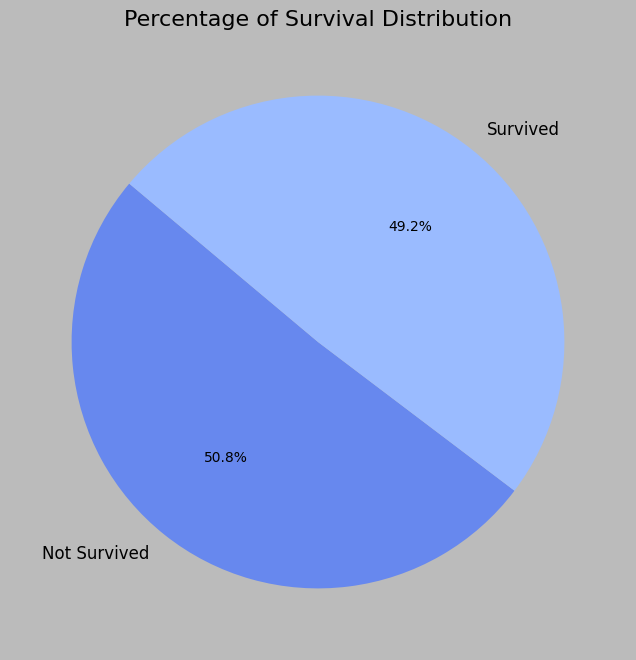

In [17]:
# Survived Distribution by percentage

plt.pie(df.groupby('Survived').size(), labels=['Not Survived', 'Survived'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Percentage of Survival Distribution')
plt.show()

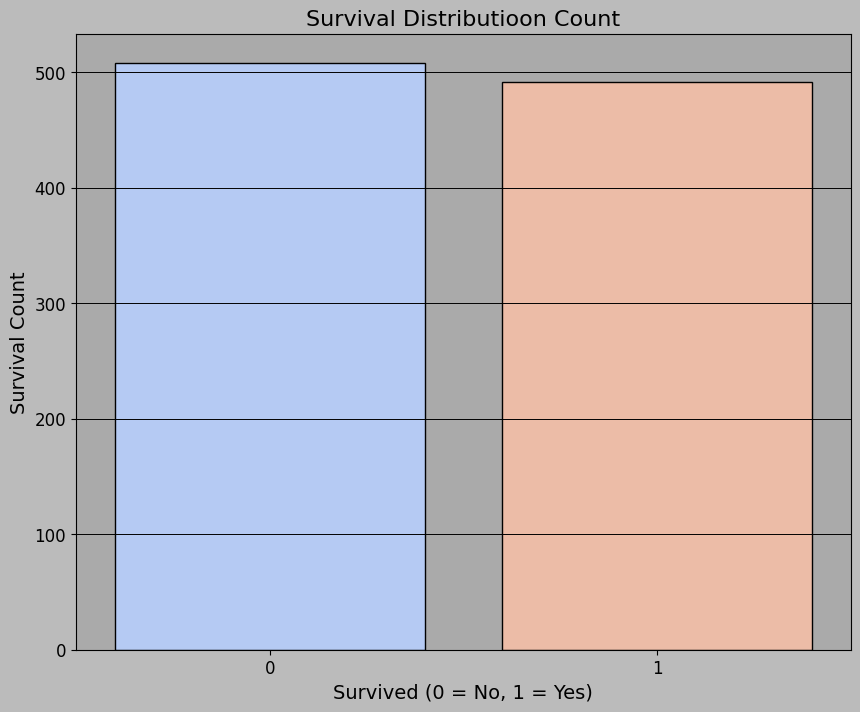

In [22]:
# Survival Distribution Count

sns.countplot(data=df,x='Survived', palette='coolwarm' ,edgecolor='black')
plt.title('Survival Distributioon Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Survival Count')
plt.grid(axis='y')
plt.show()

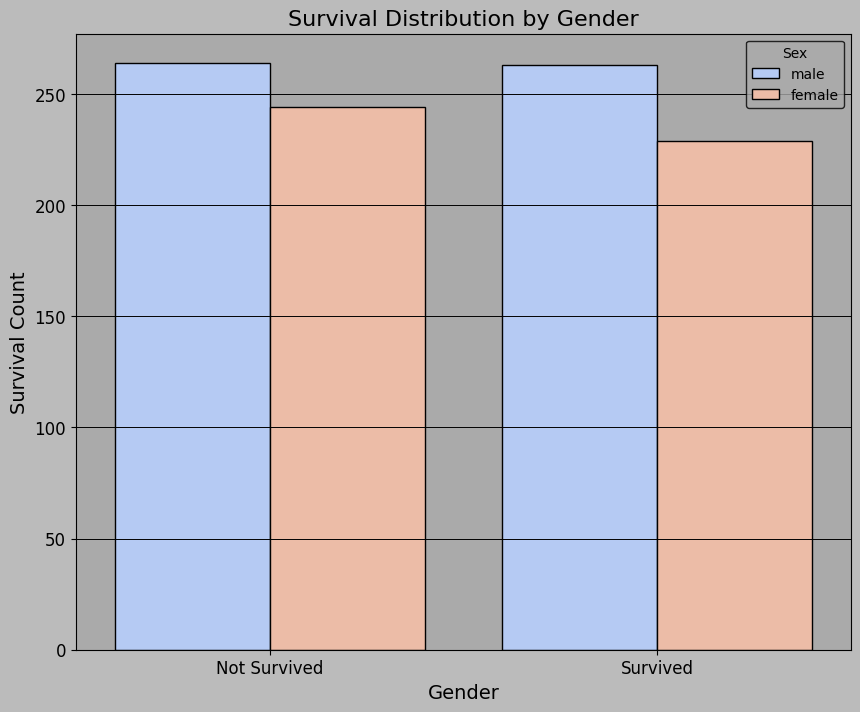

In [23]:
# Survival Distribution by Gender

sns.countplot(data=df, x='Survived', hue='Sex',
            palette='coolwarm' ,edgecolor='black')
plt.title('Survival Distribution by Gender')
plt.ylabel('Survival Count')
plt.xlabel('Gender')
plt.xticks([0,1], ['Not Survived','Survived'])
plt.grid(axis='y')
plt.show()

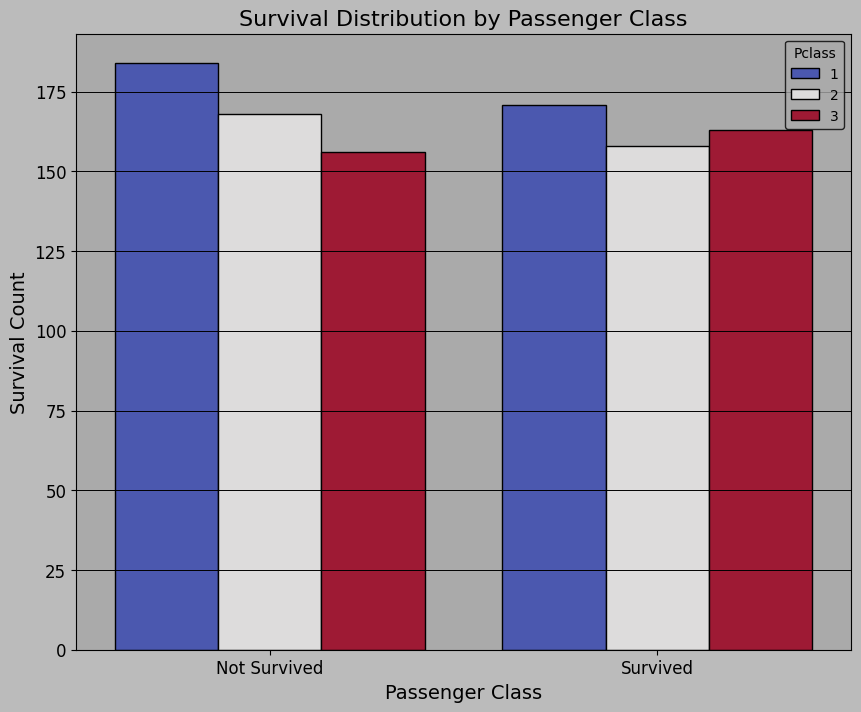

In [24]:
# Survival Distribution by Passenger Class

sns.countplot(data=df, x='Survived', hue='Pclass',
            palette='coolwarm',edgecolor='black')
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Count')
plt.xticks([0,1], ['Not Survived','Survived'])
plt.grid(axis='y')
plt.show()

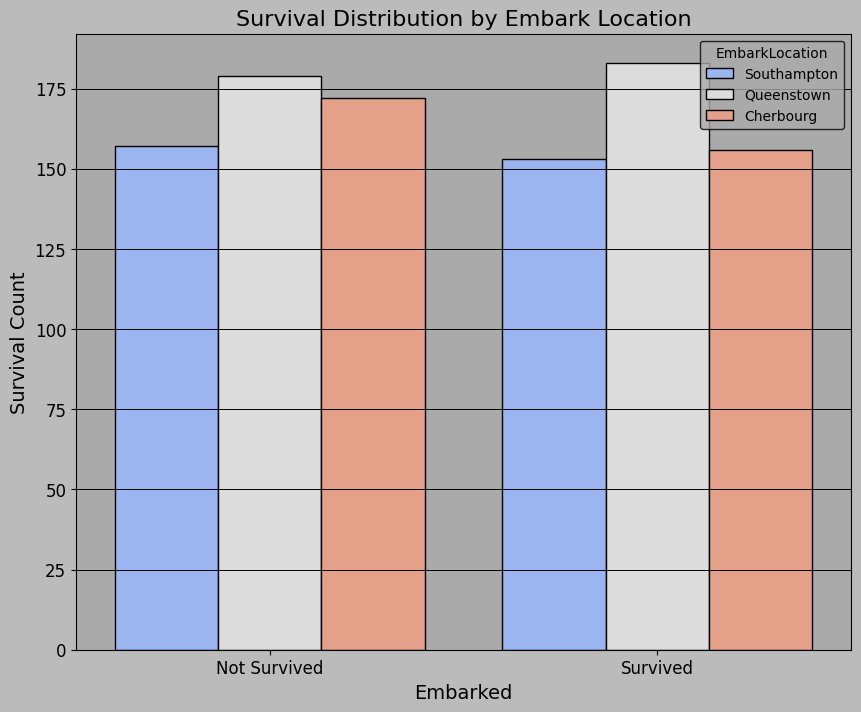

In [25]:
# Survival Distribution by Embark Location

sns.countplot(data=df, x='Survived', hue='EmbarkLocation',
            palette='coolwarm', edgecolor='black')
plt.title('Survival Distribution by Embark Location')
plt.ylabel('Survival Count')
plt.xlabel('Embarked')
plt.xticks([0,1], ['Not Survived','Survived'])
plt.grid(axis='y')
plt.show()

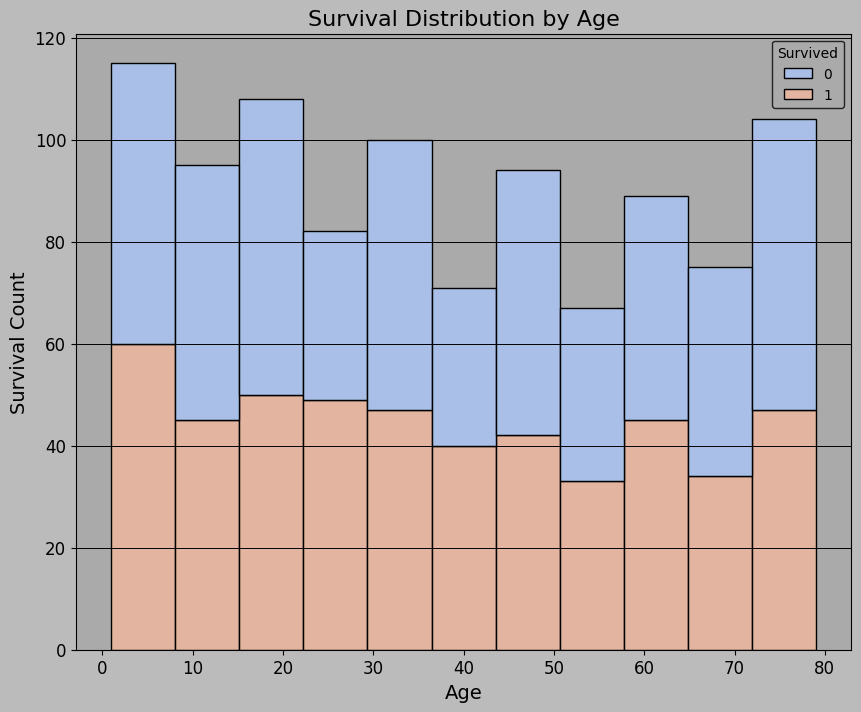

In [26]:
# Survival Distribution by Age

sns.histplot(data=df, x='Age', hue='Survived',
             multiple='stack', palette='coolwarm', edgecolor='black')
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Survival Count')
plt.grid(axis='y')
plt.show()

Correlation Analysis : \
Identify correlations for numeric features to understand their relationships.

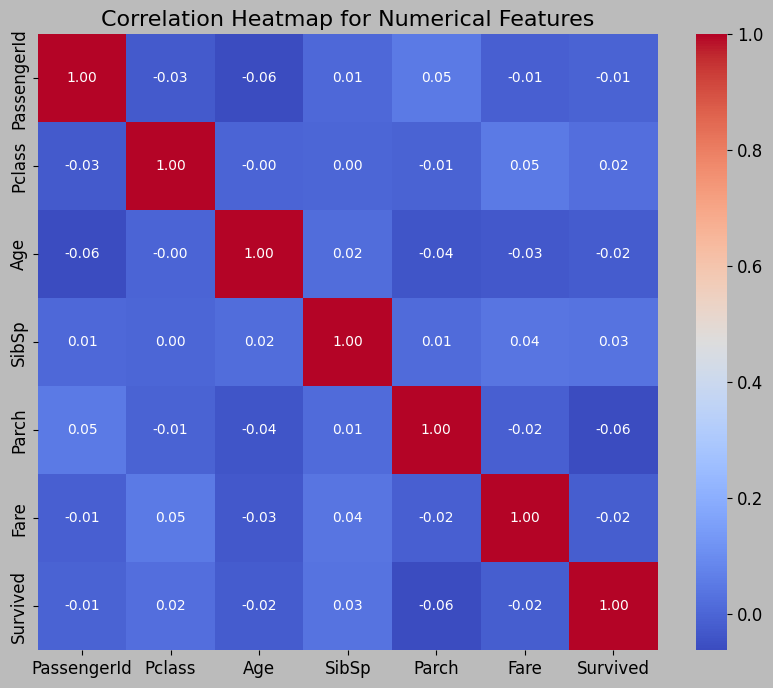

In [27]:
# Correlation Matrix

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

##### Advanced Analysis

In [28]:
# Import neccesary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

Passenger Survival Prediction

In [29]:
# Encode categorical features

df_copy = df.copy()
df_copy['Sex'] = df_copy['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(df_copy, columns=['Embarked'], drop_first=True)

In [32]:
# Define features and target
features = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Survived', 'EmbarkLocation'], axis=1)
X = features
y = titanic_data['Survived']

# Split to train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Model Prediction and Evaluation
y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [33]:
# View evaluation of Accuracy, Class Report and Confusion Matrix

print(f'Accuracy : \n{accuracy}')
print(f'Class Report : \n{classification_rep}')
print(f'Confusion Matrix: \n{conf_matrix}')

Accuracy : 
0.555
Class Report : 
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       106
           1       0.53      0.52      0.52        94

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.56      0.55       200

Confusion Matrix: 
[[62 44]
 [45 49]]


##### Summary/Conclusion

Titanic Survival Pattern

Total Passenger : 1000
- 492 passenger Survived, 49.2%
- 508 passenger Not Survived, 50.8%

By passenger gender
- 263 male, 229 female survived 
- 264 male, 244 female not survived 

By passenger class
- 171 from class 1, 163 from class 2 and 158 from class 3 are survived
- 184 from class 1, 168 from class 2 and 156 from class 3 are not survived

By passenger age
- passenger at age range of (8,21,36,60) are mostly survived  
- passenger at age range of (2,21,44,60) are mostly not survived

By passenger embark location
- 183 from Queenstown, 156 from Cherbourg and 153 from Southampton are survived
- 179 from Queenstown, 172 from Cherbourg and 157 from Southampton are not survived

##### Dashboard

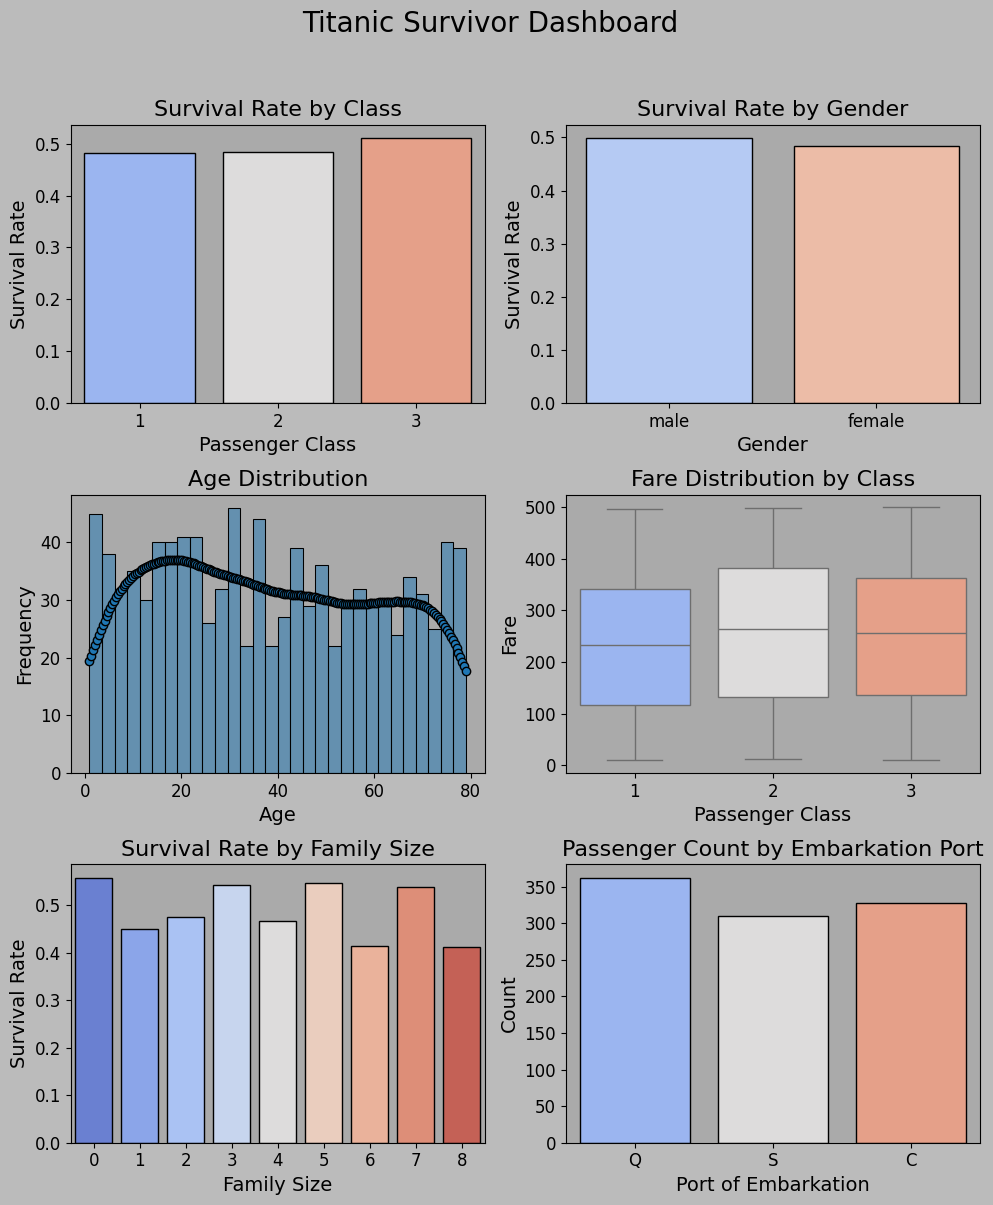

In [40]:
# Prepare data for the dashboard
df['FamilySize'] = df['SibSp'] + df['Parch']

# Initialize the dashboard layout
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('Titanic Survivor Dashboard \n', fontsize=20 , y=1)

# 1. Survival Rate by Class
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 0]
            , ci=None, palette='coolwarm', edgecolor='black')
axes[0, 0].set_title('Survival Rate by Class')
axes[0, 0].set_ylabel('Survival Rate')
axes[0, 0].set_xlabel('Passenger Class')

# 2. Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1]
            , ci=None, palette='coolwarm', edgecolor='black')
axes[0, 1].set_title('Survival Rate by Gender')
axes[0, 1].set_ylabel('Survival Rate')
axes[0, 1].set_xlabel('Gender')

# 3. Age Distribution
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[1, 0]
             , edgecolor='black')
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlabel('Age')

# 4. Fare Distribution by Class
sns.boxplot(x='Pclass', y='Fare', data=df, ax=axes[1, 1]
            , palette='coolwarm')
axes[1, 1].set_title('Fare Distribution by Class')
axes[1, 1].set_ylabel('Fare')
axes[1, 1].set_xlabel('Passenger Class')

# 5. Survival by Family Size
sns.barplot(x='FamilySize', y='Survived', data=df, ax=axes[2, 0]
            , ci=None, palette='coolwarm', edgecolor='black')
axes[2, 0].set_title('Survival Rate by Family Size')
axes[2, 0].set_ylabel('Survival Rate')
axes[2, 0].set_xlabel('Family Size')

# 6. Embarkation Trends
sns.countplot(x='Embarked', data=df, ax=axes[2, 1]
              , palette='coolwarm', edgecolor='black')
axes[2, 1].set_title('Passenger Count by Embarkation Port')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_xlabel('Port of Embarkation')

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()
